# Import packages and data 

In [1]:
import warnings
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.animation as animation
from scipy import sparse

In [2]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=200, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.18.1 scipy==1.4.1 pandas==1.0.2 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Load the SS2 FBM dataset

In [4]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/bm_ss2/data/ss2_validation_raw_20200401.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 570 × 56063 
    obs: 'barcode', 'cell.labels', 'tissue', 'orig.ident', 'minibulk_or_ss', 'well_ID'

In [6]:
adata.shape

(570, 56063)

In [7]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
34+             36
B cell          72
DC1             36
DC2             24
Mono            33
PMN             65
basophil        24
eosinophil      60
mast cell       60
myelocyte       68
pDC             36
promyelocyte    56
dtype: int64

In [8]:
adata.raw = adata

In [9]:
# filter for genes in at least 3 cells and cells with at least 200 genes 
sc.pp.filter_cells(adata, min_genes=200) # Keep all cells with at least 200 detected genes
sc.pp.filter_genes(adata, min_cells=3) # Keep all genes expressed in >= 3 cells. 

In [10]:
adata.shape

(486, 25064)

In [11]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
34+             32
B cell          52
DC1             34
DC2             15
Mono            32
PMN             65
basophil        20
eosinophil      54
mast cell       47
myelocyte       61
pDC             30
promyelocyte    44
dtype: int64

In [12]:
adata.obs["dataset"] = "SS2"
adata.obs["sequencing.type"] = "SS2"

In [13]:
adata.obs["dataset_cell.labels"] = adata.obs["dataset"].astype(str) + '_' + adata.obs["cell.labels"].astype(str)

In [14]:
cell_numbers = adata.obs.groupby(["dataset_cell.labels"]).apply(len)
cell_numbers

dataset_cell.labels
SS2_34+             32
SS2_B cell          52
SS2_DC1             34
SS2_DC2             15
SS2_Mono            32
SS2_PMN             65
SS2_basophil        20
SS2_eosinophil      54
SS2_mast cell       47
SS2_myelocyte       61
SS2_pDC             30
SS2_promyelocyte    44
dtype: int64

In [15]:
ss2 = adata

# Load the 10X FBM dataset

In [16]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/bm_plus_19pcw/data/bm_plus_19pcw_raw_dr_20200414.h5ad')

In [17]:
adata

AnnData object with n_obs × n_vars = 104652 × 33712 
    obs: 'cell.labels', 'doublets', 'fetal.ids', 'gender', 'is_doublet', 'is_doublet_poptrim', 'is_doublet_wolock', 'lanes', 'nGene', 'nUMI', 'orig.ident', 'percent.mito', 'processing.type', 'scrublet_cluster_score', 'scrublet_score', 'sequencing.type', 'sort.ids'
    var: 'gene_ids-1', 'feature_types-1'
    obsm: 'X_orig_pca', 'X_pca', 'X_umap'

In [18]:
adata.shape

(104652, 33712)

In [19]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CAR                          365
CD4 T                        327
CD8 T                        171
CD14 monocyte               8787
CD56 bright NK               540
CMP                          425
DC1                           50
DC2                          598
DC3                          705
DC precursor                 201
ELP                         1358
GMP                         1285
HSC                           92
ILC precursor                 67
Immature B cell             1998
MEMP                          16
MEP                          269
MK                          1036
MPP lymphoid                  34
MPP myeloid 1                 46
MPP myeloid 2                 46
NKT                          137
Naive B cell                1423
Pre B progenitor           14234
Pre pro B progenitor        5428
Pro B progenitor            5530
Treg                          62
basophil                     139
chondrocyte                   72
chondrocyte precursor        16

In [20]:
subset_celltypes = ["HSC", "Naive B cell", "DC1", "DC2", "CD14 monocyte", "neutrophil", "basophil", "eosinophil", "mast cell", "promyelocyte", "myelocyte", "pDC"]
adata = adata[adata.obs['cell.labels'].isin(subset_celltypes)].copy()

In [21]:
adata.shape

(23067, 33712)

In [22]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD14 monocyte    8787
DC1                50
DC2               598
HSC                92
Naive B cell     1423
basophil          139
eosinophil        325
mast cell         648
myelocyte        3854
neutrophil       4516
pDC               713
promyelocyte     1922
dtype: int64

In [23]:
adata.obs["dataset"] = "10X"

In [24]:
adata.obs["dataset_cell.labels"] = adata.obs["dataset"].astype(str) + '_' + adata.obs["cell.labels"].astype(str)

In [25]:
cell_numbers = adata.obs.groupby(["dataset_cell.labels"]).apply(len)
cell_numbers

dataset_cell.labels
10X_CD14 monocyte    8787
10X_DC1                50
10X_DC2               598
10X_HSC                92
10X_Naive B cell     1423
10X_basophil          139
10X_eosinophil        325
10X_mast cell         648
10X_myelocyte        3854
10X_neutrophil       4516
10X_pDC               713
10X_promyelocyte     1922
dtype: int64

# Downsample the 10X data 

In [26]:
tot_adata = anndata.AnnData
for i in adata.obs["cell.labels"].unique().tolist():
    print(i)
    subset = adata[adata.obs['cell.labels'].isin([i])].copy()
    print(subset.shape)
    sc.pp.subsample(subset, n_obs = 50)
    print(subset.shape)
    tot_adata = tot_adata.concatenate(subset, join='outer', index_unique=None)

neutrophil
(4516, 33712)
(50, 33712)
CD14 monocyte
(8787, 33712)
(50, 33712)
myelocyte
(3854, 33712)
(50, 33712)
mast cell
(648, 33712)
(50, 33712)
promyelocyte
(1922, 33712)
(50, 33712)
eosinophil
(325, 33712)
(50, 33712)
pDC
(713, 33712)
(50, 33712)
DC2
(598, 33712)
(50, 33712)
Naive B cell
(1423, 33712)
(50, 33712)
DC1
(50, 33712)
(50, 33712)
HSC
(92, 33712)
(50, 33712)
basophil
(139, 33712)
(50, 33712)


In [27]:
adata = tot_adata

In [28]:
adata.shape

(600, 33712)

In [29]:
cell_numbers = adata.obs.groupby(["dataset_cell.labels"]).apply(len)
cell_numbers

dataset_cell.labels
10X_CD14 monocyte    50
10X_DC1              50
10X_DC2              50
10X_HSC              50
10X_Naive B cell     50
10X_basophil         50
10X_eosinophil       50
10X_mast cell        50
10X_myelocyte        50
10X_neutrophil       50
10X_pDC              50
10X_promyelocyte     50
dtype: int64

In [30]:
adata_10x = adata

# Merge the validation dataset

In [31]:
merged = adata_10x.concatenate(ss2, index_unique=None, join='outer')

In [32]:
merged.shape

(1086, 42802)

In [33]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
cell_numbers = merged.obs.groupby(["dataset_cell.labels"]).apply(len)
cell_numbers

dataset_cell.labels
10X_CD14 monocyte    50
10X_DC1              50
10X_DC2              50
10X_HSC              50
10X_Naive B cell     50
10X_basophil         50
10X_eosinophil       50
10X_mast cell        50
10X_myelocyte        50
10X_neutrophil       50
10X_pDC              50
10X_promyelocyte     50
SS2_34+              32
SS2_B cell           52
SS2_DC1              34
SS2_DC2              15
SS2_Mono             32
SS2_PMN              65
SS2_basophil         20
SS2_eosinophil       54
SS2_mast cell        47
SS2_myelocyte        61
SS2_pDC              30
SS2_promyelocyte     44
dtype: int64

In [34]:
merged

AnnData object with n_obs × n_vars = 1086 × 42802 
    obs: 'barcode', 'batch', 'cell.labels', 'dataset', 'dataset_cell.labels', 'doublets', 'fetal.ids', 'gender', 'is_doublet', 'is_doublet_poptrim', 'is_doublet_wolock', 'lanes', 'minibulk_or_ss', 'nGene', 'nUMI', 'n_genes', 'orig.ident', 'percent.mito', 'processing.type', 'scrublet_cluster_score', 'scrublet_score', 'sequencing.type', 'sort.ids', 'tissue', 'well_ID'
    var: 'gene_ids-1-0-0-0-0-0-0-0-0-0-0-0-0', 'feature_types-1-0-0-0-0-0-0-0-0-0-0-0-0', 'gene_ids-1-1-0-0-0-0-0-0-0-0-0-0-0', 'feature_types-1-1-0-0-0-0-0-0-0-0-0-0-0', 'gene_ids-1-1-0-0-0-0-0-0-0-0-0-0', 'feature_types-1-1-0-0-0-0-0-0-0-0-0-0', 'gene_ids-1-1-0-0-0-0-0-0-0-0-0', 'feature_types-1-1-0-0-0-0-0-0-0-0-0', 'gene_ids-1-1-0-0-0-0-0-0-0-0', 'feature_types-1-1-0-0-0-0-0-0-0-0', 'gene_ids-1-1-0-0-0-0-0-0-0', 'feature_types-1-1-0-0-0-0-0-0-0', 'gene_ids-1-1-0-0-0-0-0-0', 'feature_types-1-1-0-0-0-0-0-0', 'gene_ids-1-1-0-0-0-0-0', 'feature_types-1-1-0-0-0-0-0', 'gene_i

In [35]:
adata = merged

In [36]:
adata.shape

(1086, 42802)

In [37]:
adata.X

<1086x42802 sparse matrix of type '<class 'numpy.float32'>'
	with 3022070 stored elements in Compressed Sparse Row format>

In [38]:
adata.X = np.nan_to_num(adata.X, copy=False)

In [39]:
adata.X

<1086x42802 sparse matrix of type '<class 'numpy.float32'>'
	with 3022070 stored elements in Compressed Sparse Row format>

# Pre-process the datasets 

In [40]:
# normalise count data
sc.pp.normalize_total(adata)

In [41]:
# log the count data
sc.pp.log1p(adata)

In [42]:
# find variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [43]:
# scale the data 
sc.pp.scale(adata, max_value=10)
# scale the negative values in adata.X (which have been normalised, logged and scaled) to zero 
adata.X = np.where(adata.X < 0, 0, adata.X)

# Add snn and dimensional reduction (incl. PCA, UMAP)

In [44]:
# run pca
sc.tl.pca(adata, n_comps=50)

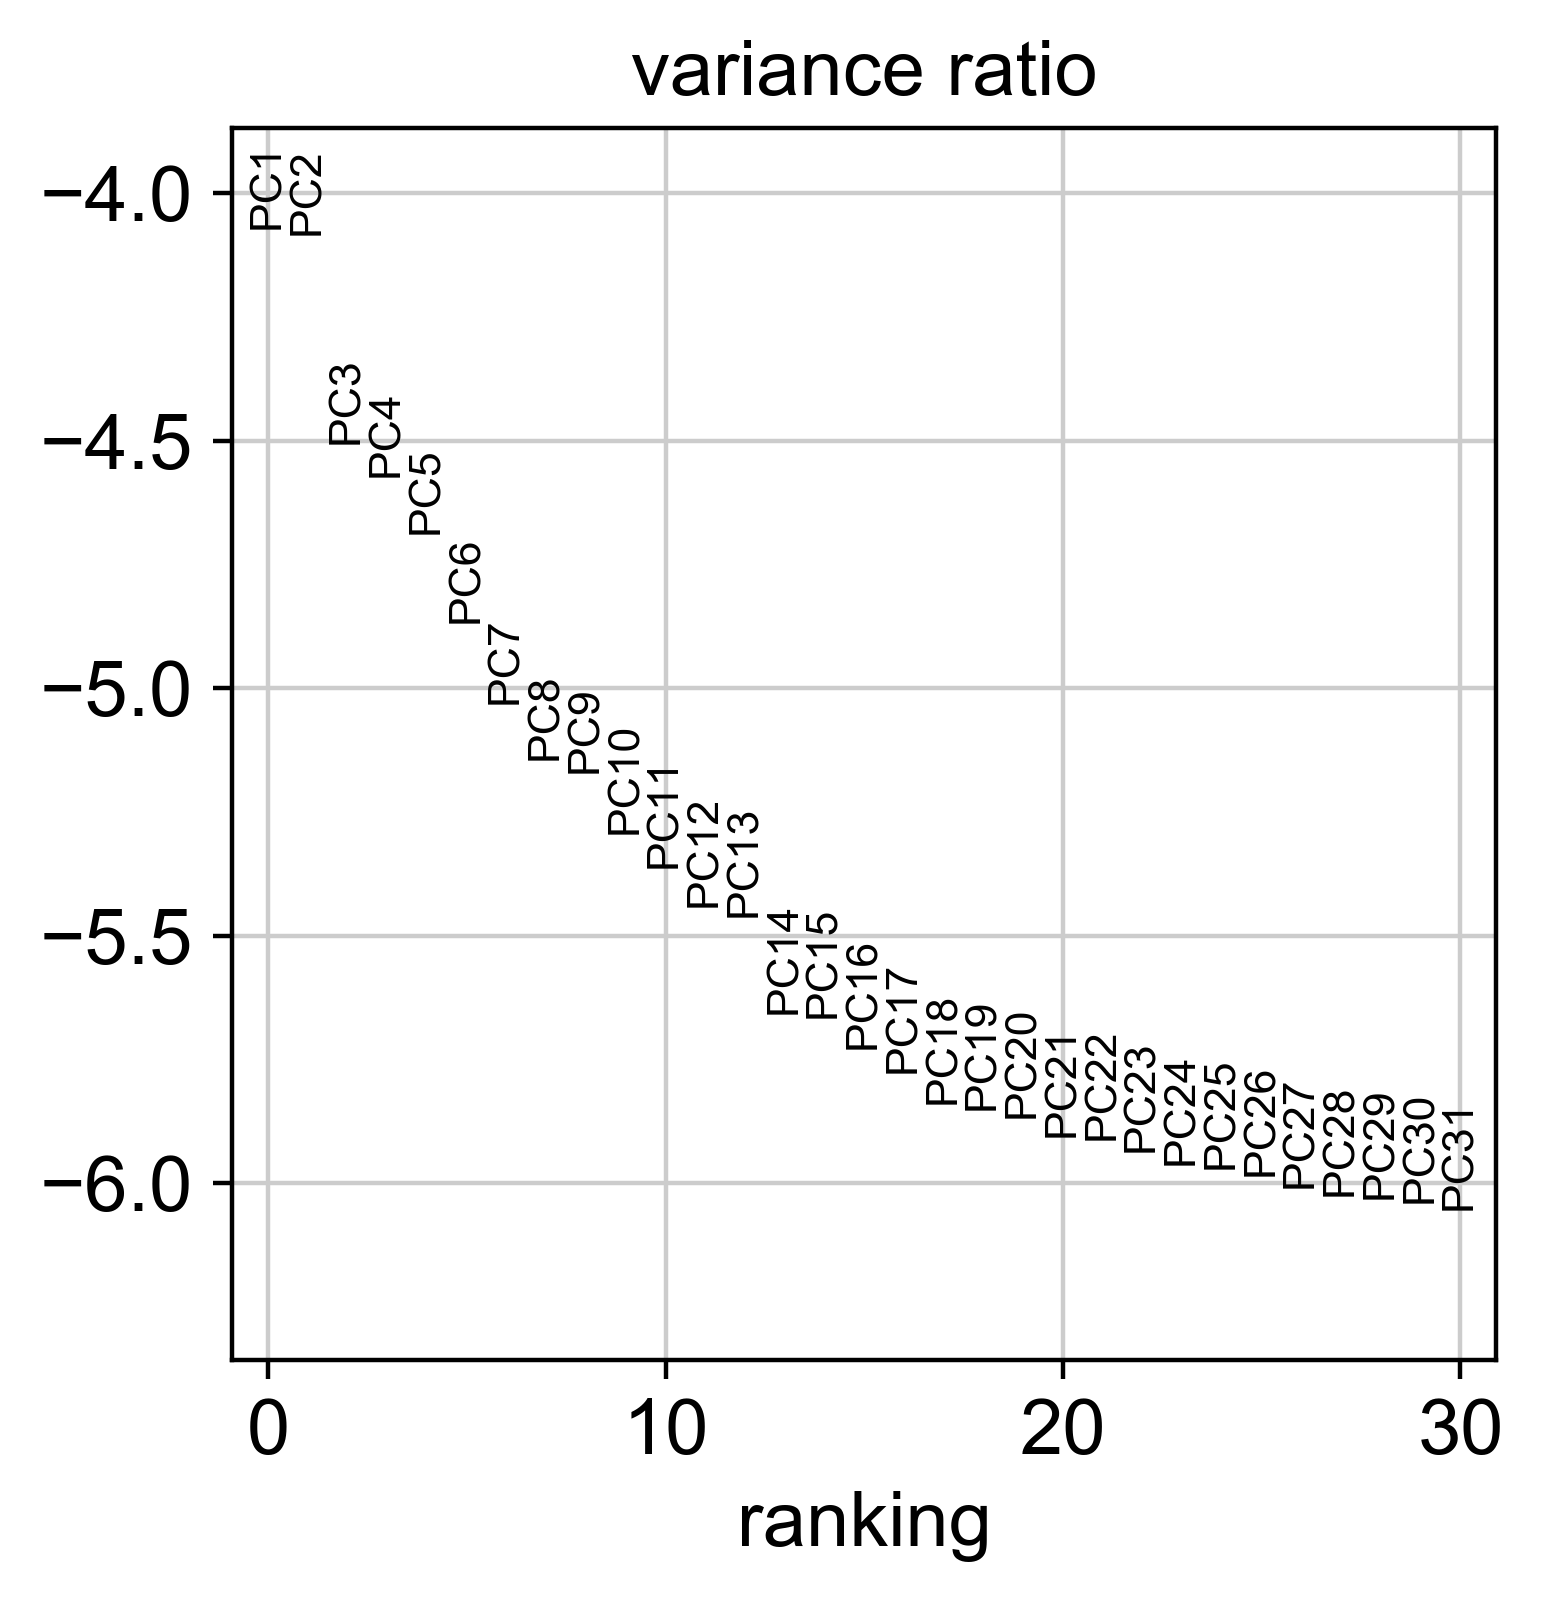

In [45]:
# have a look at pc's in order to choose number of pcs that will be used downstream. 
sc.pl.pca_variance_ratio(adata, log=True)

In [46]:
# run snn neighbourhood graph
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20) 

In [47]:
# run umap
sc.tl.umap(adata) 

... storing 'barcode' as categorical
... storing 'cell.labels' as categorical
... storing 'dataset' as categorical
... storing 'dataset_cell.labels' as categorical
... storing 'doublets' as categorical
... storing 'fetal.ids' as categorical
... storing 'gender' as categorical
... storing 'is_doublet' as categorical
... storing 'is_doublet_poptrim' as categorical
... storing 'is_doublet_wolock' as categorical
... storing 'lanes' as categorical
... storing 'minibulk_or_ss' as categorical
... storing 'orig.ident' as categorical
... storing 'processing.type' as categorical
... storing 'sequencing.type' as categorical
... storing 'sort.ids' as categorical
... storing 'tissue' as categorical
... storing 'well_ID' as categorical
... storing 'gene_ids-1-0-0-0-0-0-0-0-0-0-0-0-0' as categorical
... storing 'feature_types-1-0-0-0-0-0-0-0-0-0-0-0-0' as categorical
... storing 'gene_ids-1-1-0-0-0-0-0-0-0-0-0-0-0' as categorical
... storing 'feature_types-1-1-0-0-0-0-0-0-0-0-0-0-0' as categorical
..

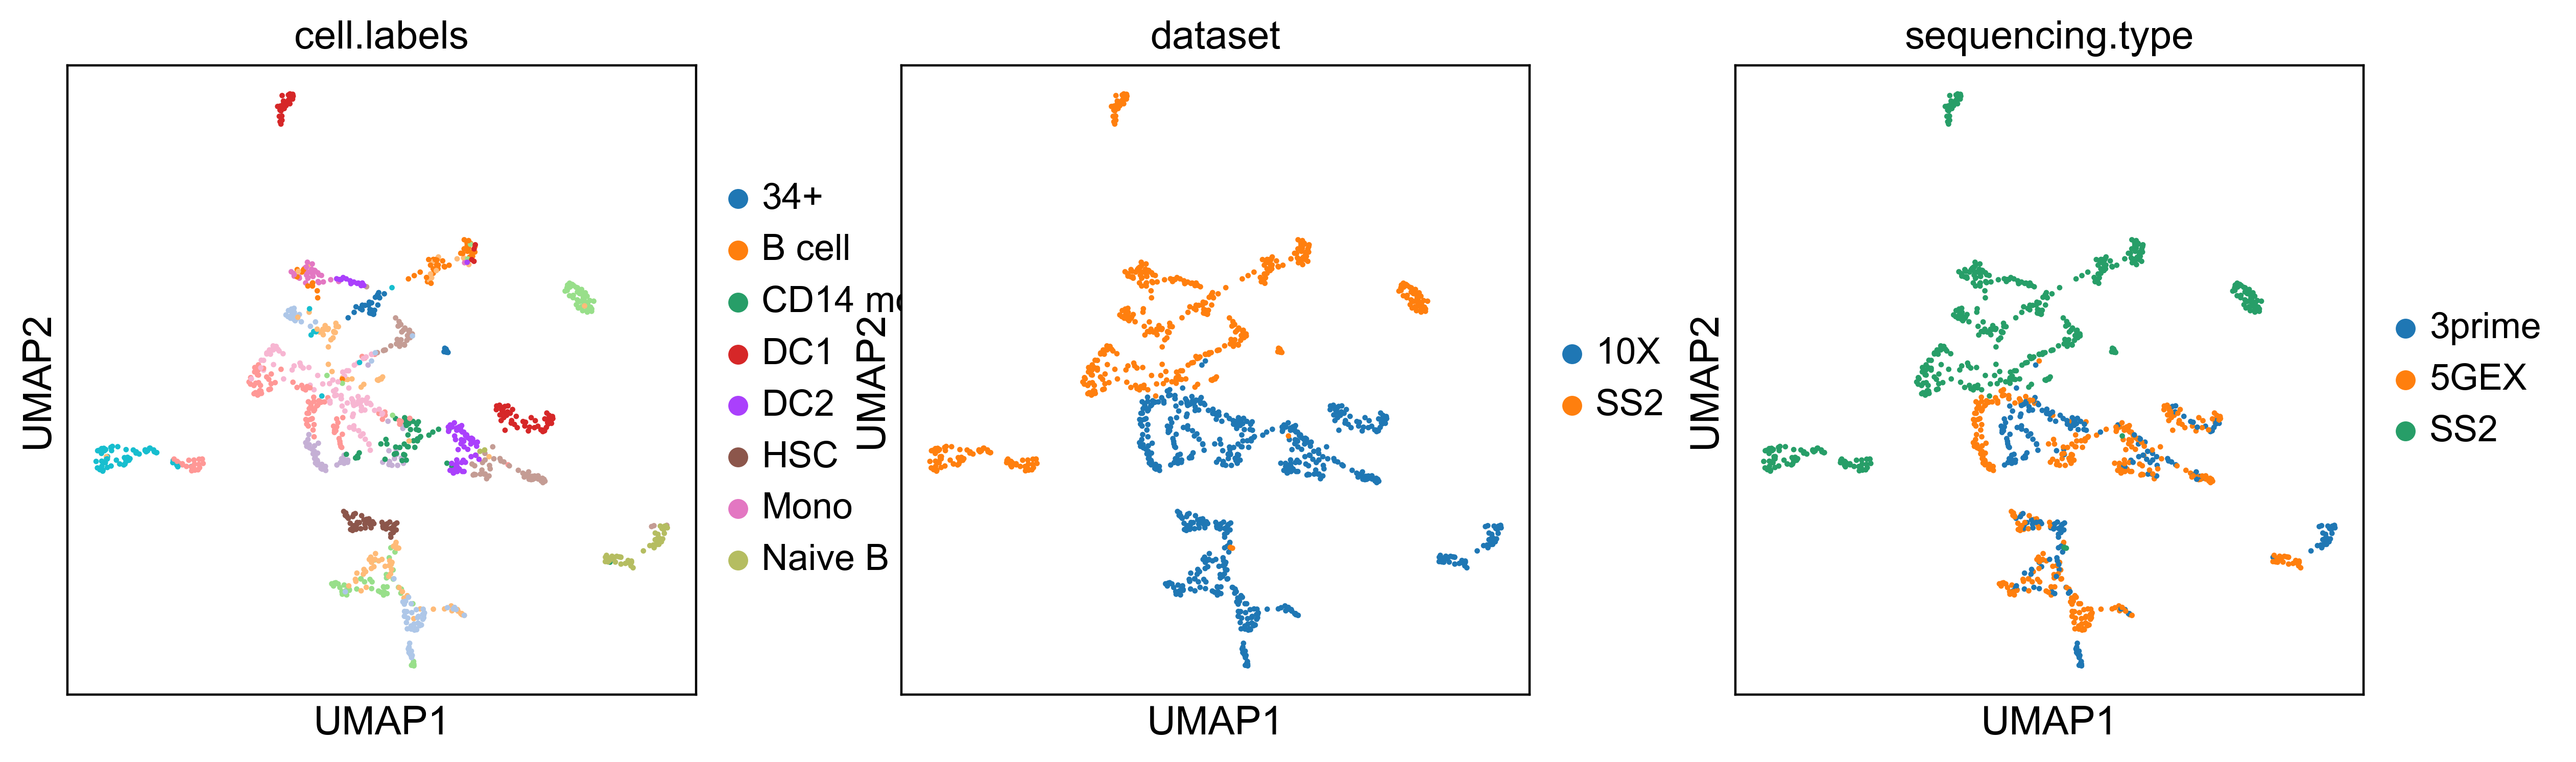

In [48]:
sc.pl.umap(adata, color=["cell.labels", "dataset", "sequencing.type"], size=15)

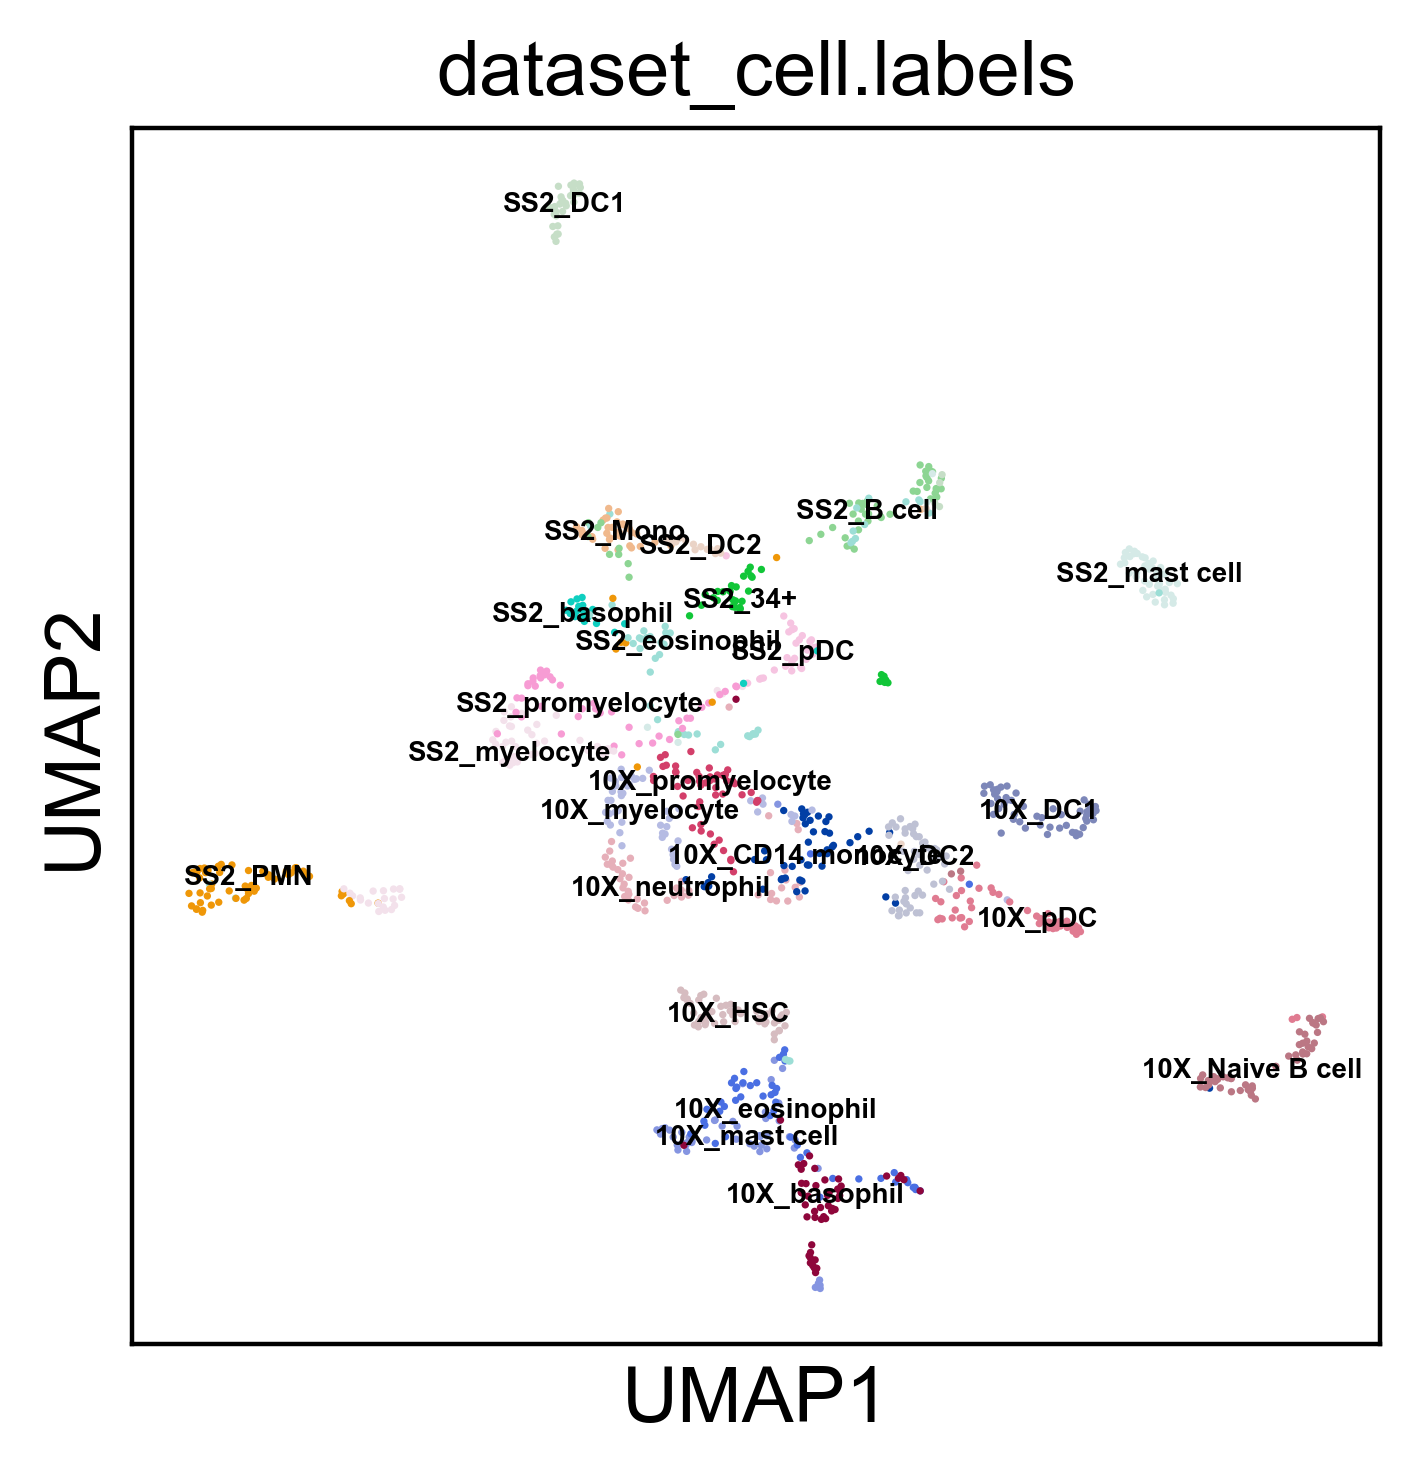

In [49]:
sc.settings.set_figure_params(dpi=200, dpi_save=1000)
sc.pl.umap(adata, color=["dataset_cell.labels"], size=7, legend_loc="on data", legend_fontsize=5)

# Plot dimensional reduction pre harmony

In [50]:
## UMAP
sc.pl.umap(adata, color='dataset_cell.labels', save='_ss2_validation_19pcw_pre-harmony_20200414_dataset_labels_legoff.pdf', show=False, size=15) 
sc.pl.umap(adata, color='dataset_cell.labels', save='_ss2_validation_19pcw_pre-harmony_20200414_dataset_labels_legon.pdf', show=False, size=15, legend_loc="on data", legend_fontsize=6)

## UMAP
sc.pl.umap(adata, color='sequencing.type', save='_ss2_validation_pre-harmony_20200414_seq_type_legoff.pdf', show=False, size=15) 
sc.pl.umap(adata, color='sequencing.type', save='_ss2_validation_pre-harmony_20200414_seq_type_legon.pdf', show=False, size=15, legend_loc="on data", legend_fontsize=6)
sc.pl.umap(adata, color='orig.ident', save='_ss2_validation_pre-harmony_20200414_sample_legoff.pdf', show=False, size=15) 
sc.pl.umap(adata, color='orig.ident', save='_ss2_validation_pre-harmony_20200414_sample_legon.pdf', show=False, size=15, legend_loc="on data", legend_fontsize=6)

# Harmony batch correction by sample

In [51]:
#harmony prep - save pca and batch (sample) metadata columns 
pca = adata.obsm['X_pca']
batch = adata.obs['sequencing.type']

In [52]:
# load up harmony in rpy2
%load_ext rpy2.ipython

In [53]:
%%R -i pca -i batch -o hem

library(harmony)
library(magrittr)

hem = HarmonyMatrix(pca, batch, theta=3, verbose=TRUE, do_pca=FALSE)
hem = data.frame(hem)

R[write to console]: Loading required package: Rcpp

R[write to console]: Harmony 1/10

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[

R[write to console]: Harmony 7/10

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write t

In [54]:
# save old pca values or orig.pca and save batch corrected pca results in anndata object as x_pca
adata.obsm['X_orig_pca'] = adata.obsm['X_pca']
adata.obsm['X_pca'] = hem.values

# Recalculate PCs and other dimensional reduction coordinates based on harmony

In [55]:
# run snn neighbourhood graph
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=15) 

In [56]:
# run umap
sc.tl.umap(adata) 

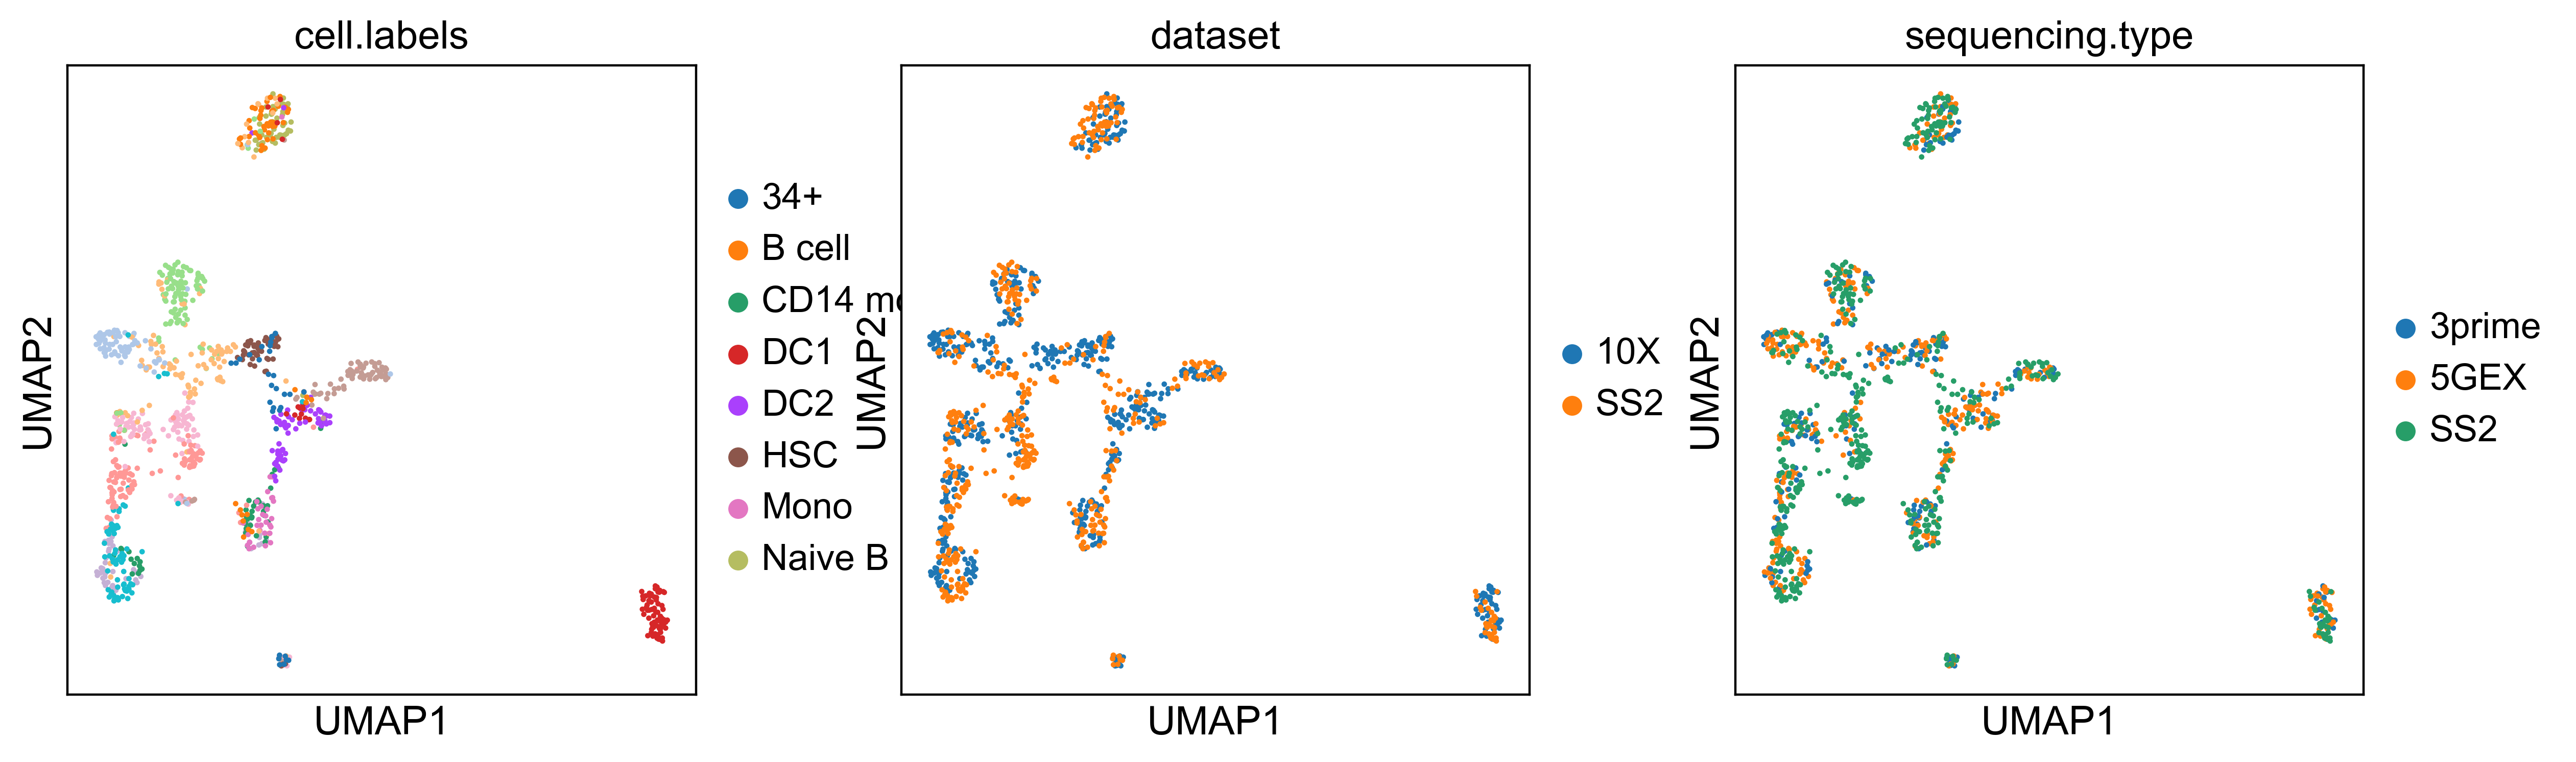

In [57]:
sc.pl.umap(adata, color=["cell.labels", "dataset", "sequencing.type"], size=15)

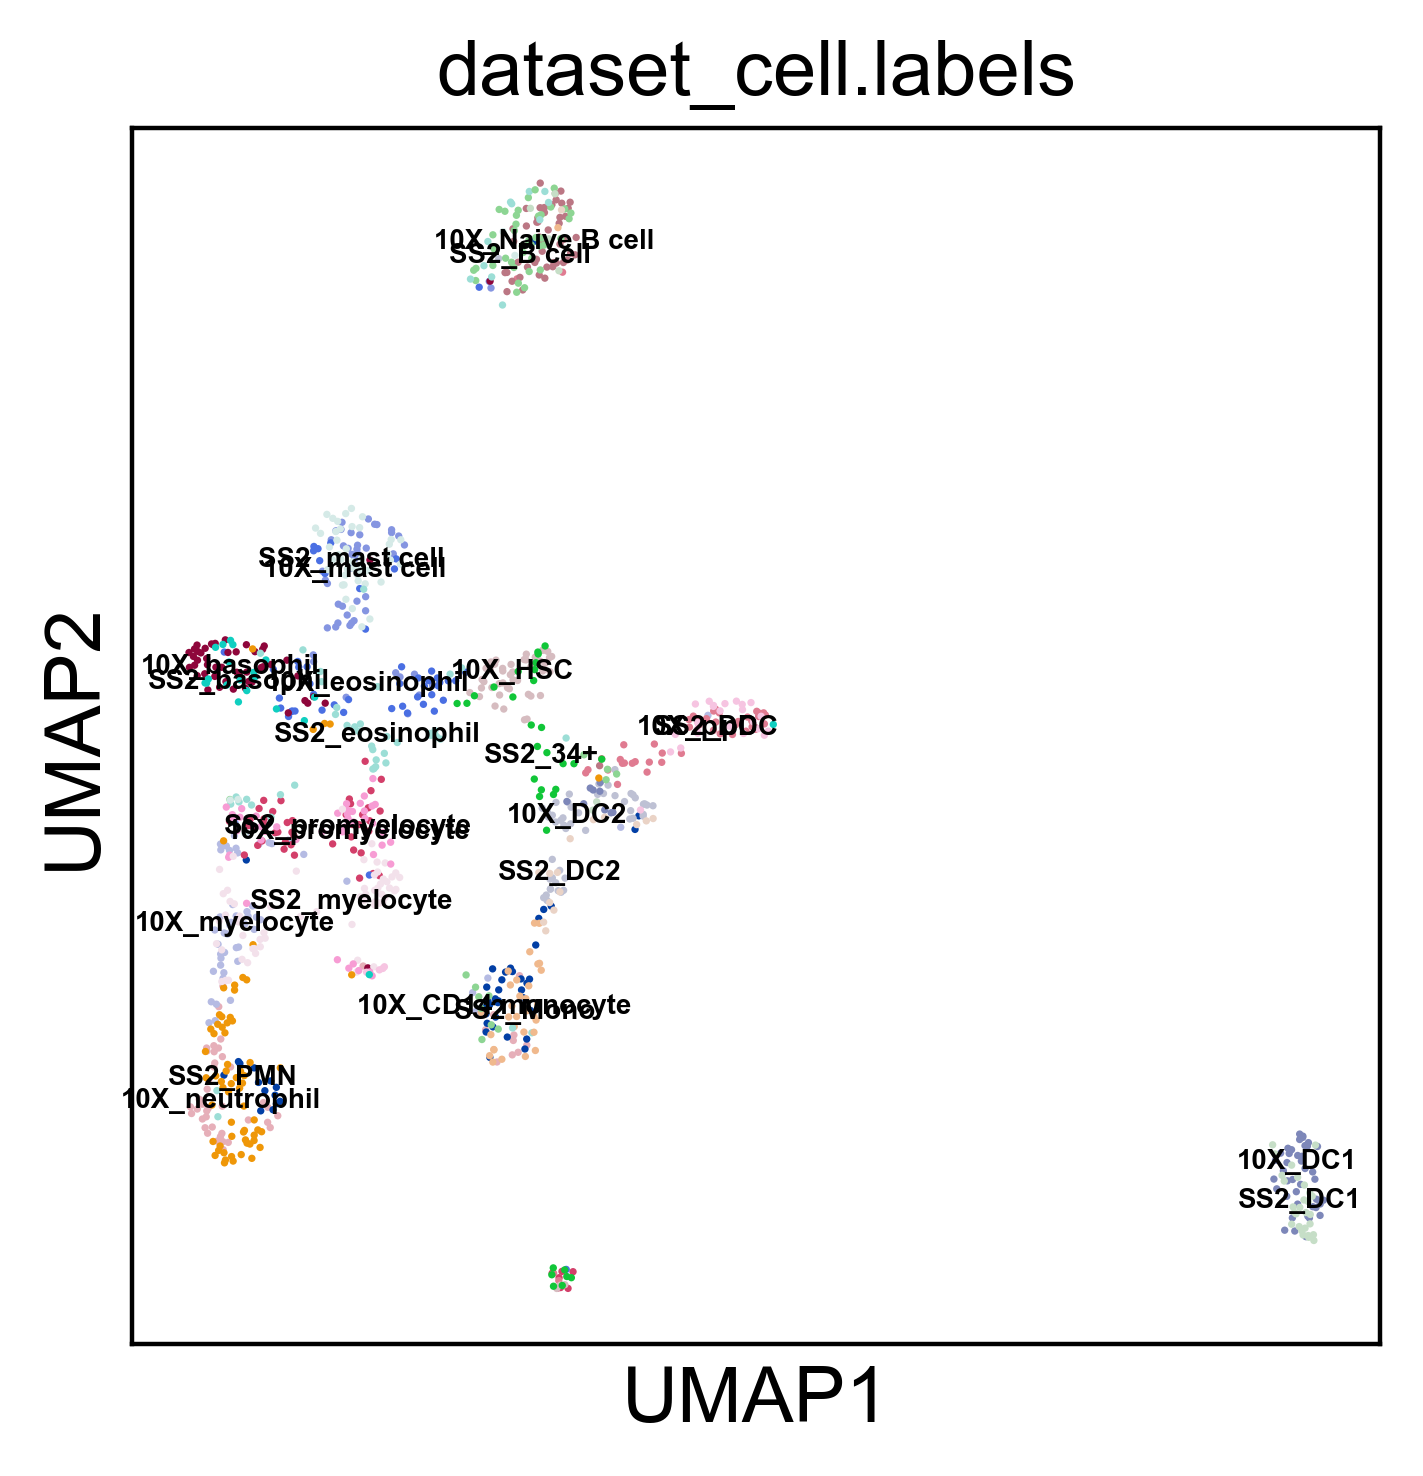

In [58]:
sc.settings.set_figure_params(dpi=200, dpi_save=1000)
sc.pl.umap(adata, color=["dataset_cell.labels"], size=7, legend_loc="on data", legend_fontsize=5)

# Change colours for UMAP plot

In [59]:
adata.obs["dataset_cell.labels"] = adata.obs["dataset_cell.labels"].astype('category')
adata.obs["dataset_cell.labels"].cat.categories

Index(['10X_CD14 monocyte', '10X_DC1', '10X_DC2', '10X_HSC', '10X_Naive B cell', '10X_basophil', '10X_eosinophil', '10X_mast cell', '10X_myelocyte', '10X_neutrophil', '10X_pDC', '10X_promyelocyte', 'SS2_34+', 'SS2_B cell', 'SS2_DC1', 'SS2_DC2', 'SS2_Mono', 'SS2_PMN', 'SS2_basophil', 'SS2_eosinophil', 'SS2_mast cell', 'SS2_myelocyte', 'SS2_pDC', 'SS2_promyelocyte'], dtype='object')

In [60]:
adata.obs["dataset_cell.labels"] = adata.obs["dataset_cell.labels"].cat.reorder_categories([ 
'10X_HSC', 'SS2_34+', '10X_promyelocyte', 'SS2_promyelocyte', '10X_myelocyte', 'SS2_myelocyte',  
'10X_neutrophil', 'SS2_PMN', '10X_mast cell',
'SS2_mast cell', '10X_eosinophil', 'SS2_eosinophil', '10X_basophil', 'SS2_basophil', '10X_CD14 monocyte', 
'SS2_Mono', '10X_pDC', 'SS2_pDC', '10X_Naive B cell', 'SS2_B cell', '10X_DC1', 'SS2_DC1', '10X_DC2',  'SS2_DC2'])               

In [61]:
adata.obs["dataset_cell.labels"] = adata.obs["dataset_cell.labels"].astype('category')
adata.obs["dataset_cell.labels"].cat.categories

Index(['10X_HSC', 'SS2_34+', '10X_promyelocyte', 'SS2_promyelocyte', '10X_myelocyte', 'SS2_myelocyte', '10X_neutrophil', 'SS2_PMN', '10X_mast cell', 'SS2_mast cell', '10X_eosinophil', 'SS2_eosinophil', '10X_basophil', 'SS2_basophil', '10X_CD14 monocyte', 'SS2_Mono', '10X_pDC', 'SS2_pDC', '10X_Naive B cell', 'SS2_B cell', '10X_DC1', 'SS2_DC1', '10X_DC2', 'SS2_DC2'], dtype='object')

In [62]:
adata.obs["dataset_cell.labels"].cat.categories[2]

'10X_promyelocyte'

In [63]:
new_colors = np.array(adata.uns["dataset_cell.labels_colors"])

new_colors[[0]] = '#e33dda' # 10X HSC
new_colors[[1]] = '#91158a' # SS2 HSC
new_colors[[2]] = '#7b7bff' # 10X promyelocyte
new_colors[[3]] = '#0000ff' # SS2 promyelocyte
new_colors[[4]] = '#00a500' # 10X myelocyte
new_colors[[5]] = '#005300' # SS2 myelocyte
new_colors[[6]] = '#ffcdcd'# 10X neutrophil
new_colors[[7]] = '#ff9191' # SS2 neutrophil
new_colors[[8]] = '#ff6868'# 10X mast cell
new_colors[[9]] = '#C30000' # SS2 mast cell
new_colors[[10]] = '#b267e6' # 10X eosinophil
new_colors[[11]] = '#771eb4' # SS2 eosinophil
new_colors[[12]] = '#c3c300' # 10X basophil
new_colors[[13]] = '#9b9b00' # SS2 basophil
new_colors[[14]] = '#ffb125'# 10X CD14 monocyte
new_colors[[15]] = '#d28700' # SS2 monocyte
new_colors[[16]] = '#ffc0cb' # 10X pDC
new_colors[[17]] = '#ff4467' # SS2 pDC
new_colors[[18]] = '#d04646' # 10X naive B cell
new_colors[[19]] = '#7d2020' # SS2 B cell
new_colors[[20]] = '#7b7bff' # 10X DC1
new_colors[[21]] = '#0000ff' # SS2 DC1
new_colors[[22]] = '#ffcdcd'# 10X DC2
new_colors[[23]] = '#c30000' # SS2 DC2

adata.uns["dataset_cell.labels_colors"] = new_colors

new_colors

array(['#e33dda', '#91158a', '#7b7bff', '#0000ff', '#00a500', '#005300',
       '#ffcdcd', '#ff9191', '#ff6868', '#C30000', '#b267e6', '#771eb4',
       '#c3c300', '#9b9b00', '#ffb125', '#d28700', '#ffc0cb', '#ff4467',
       '#d04646', '#7d2020', '#7b7bff', '#0000ff', '#ffcdcd', '#c30000'],
      dtype='<U7')

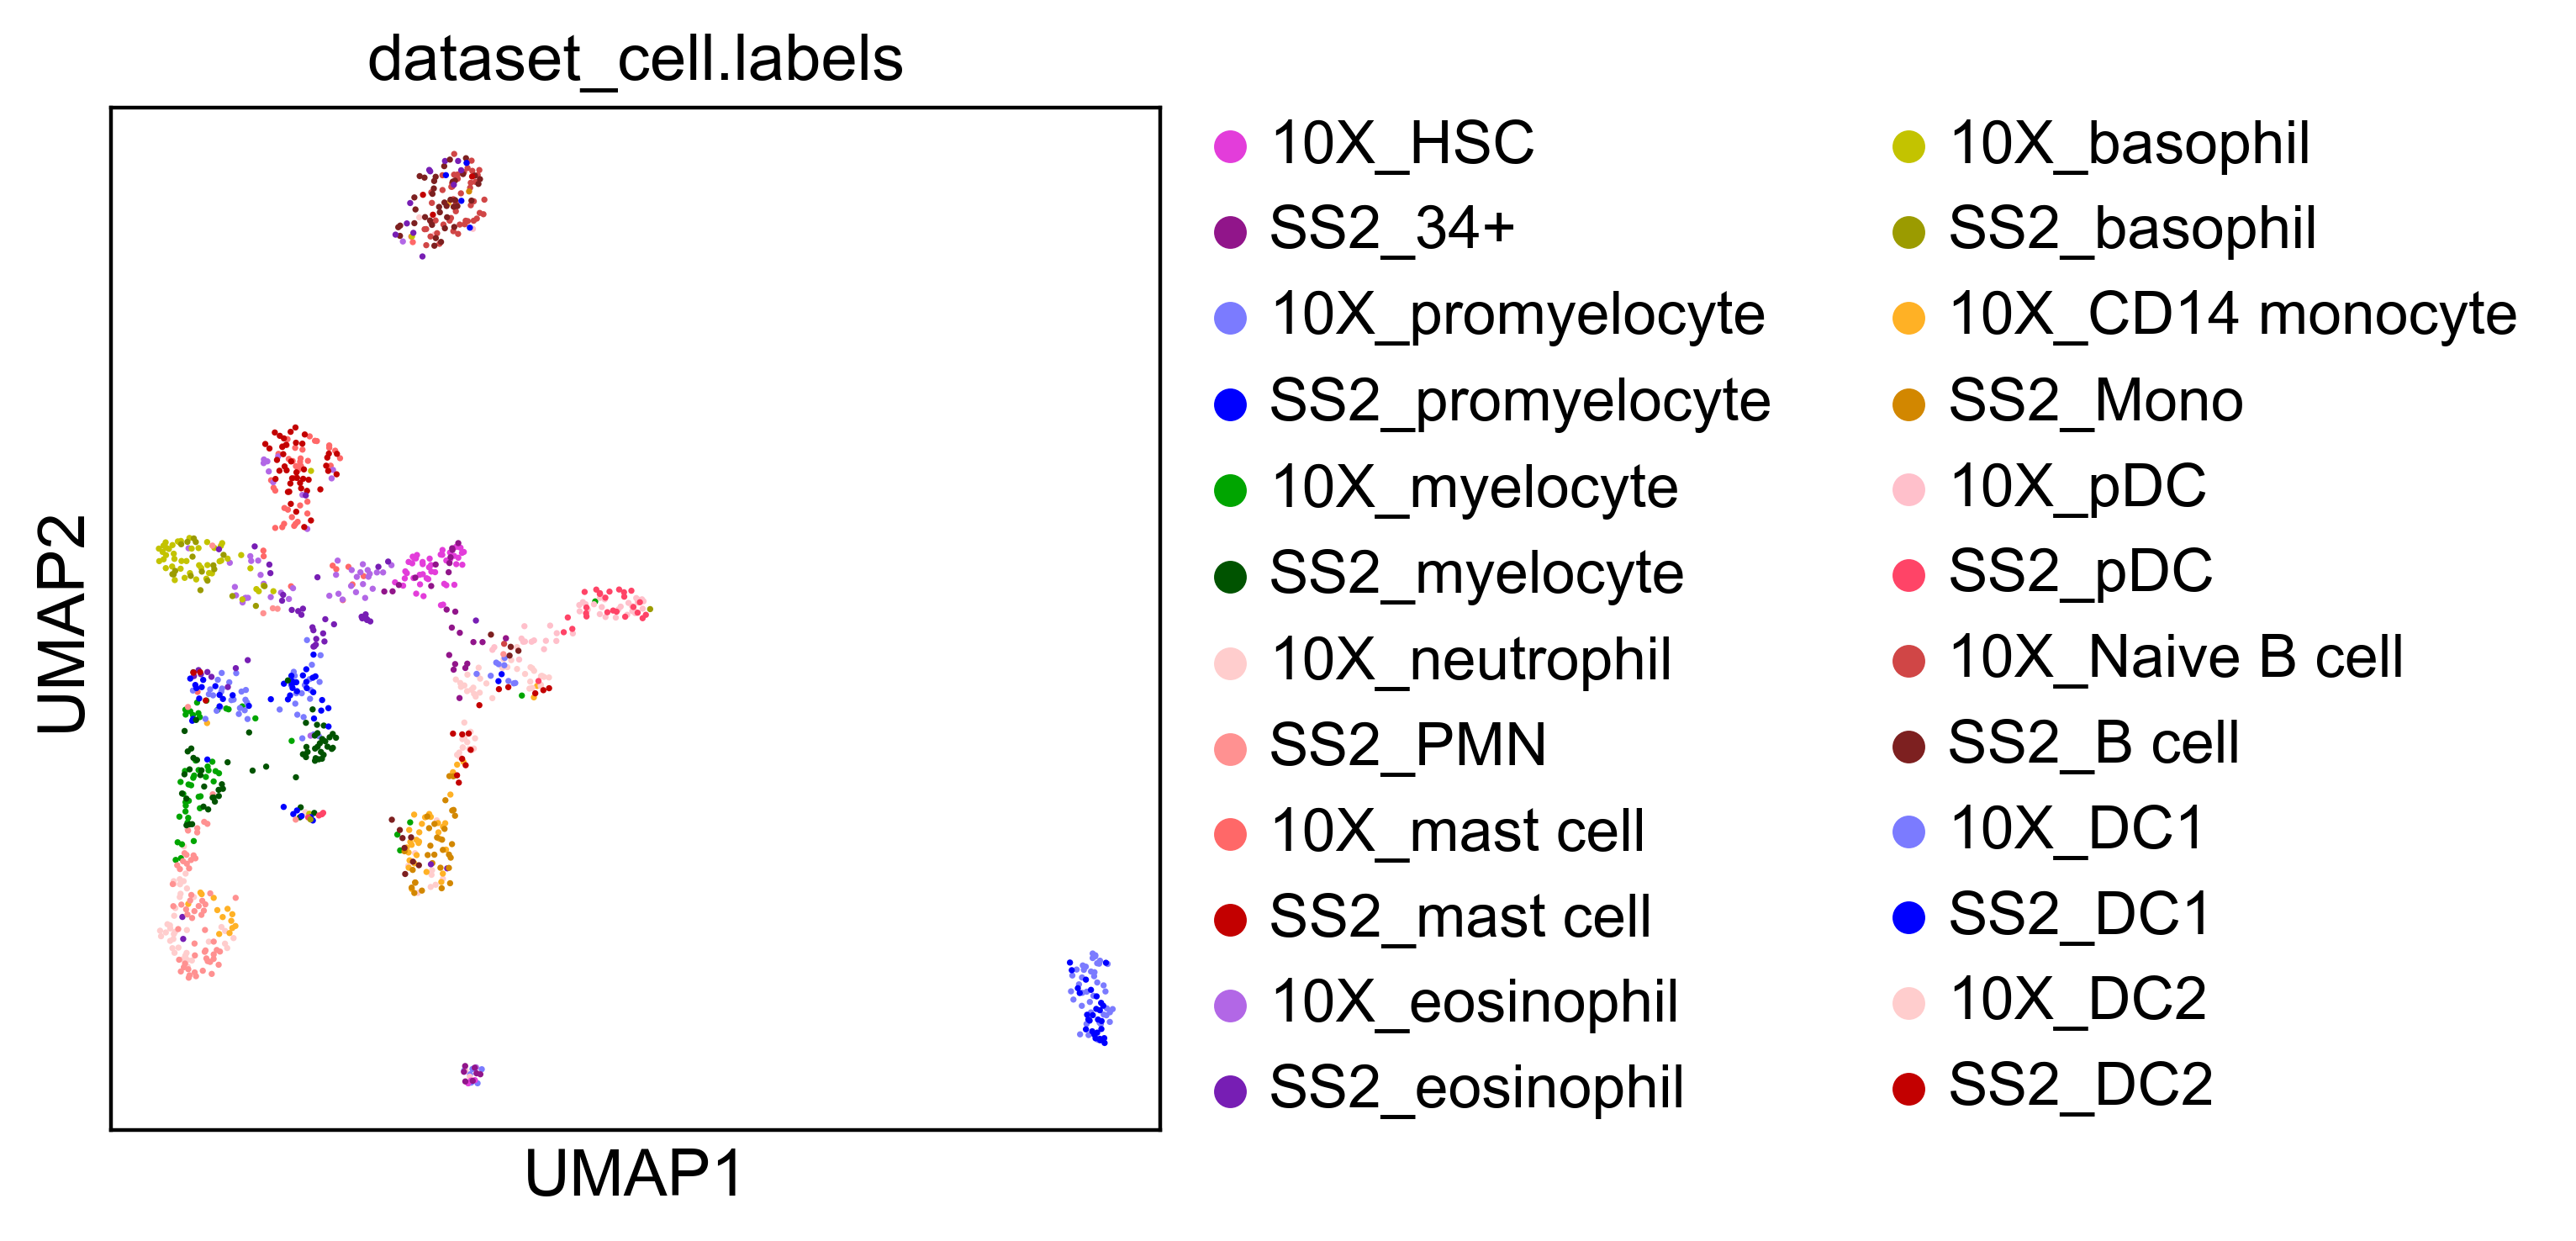

In [64]:
sc.settings.set_figure_params(dpi=200, dpi_save=1000)
sc.pl.umap(adata, color=["dataset_cell.labels"], size=7)

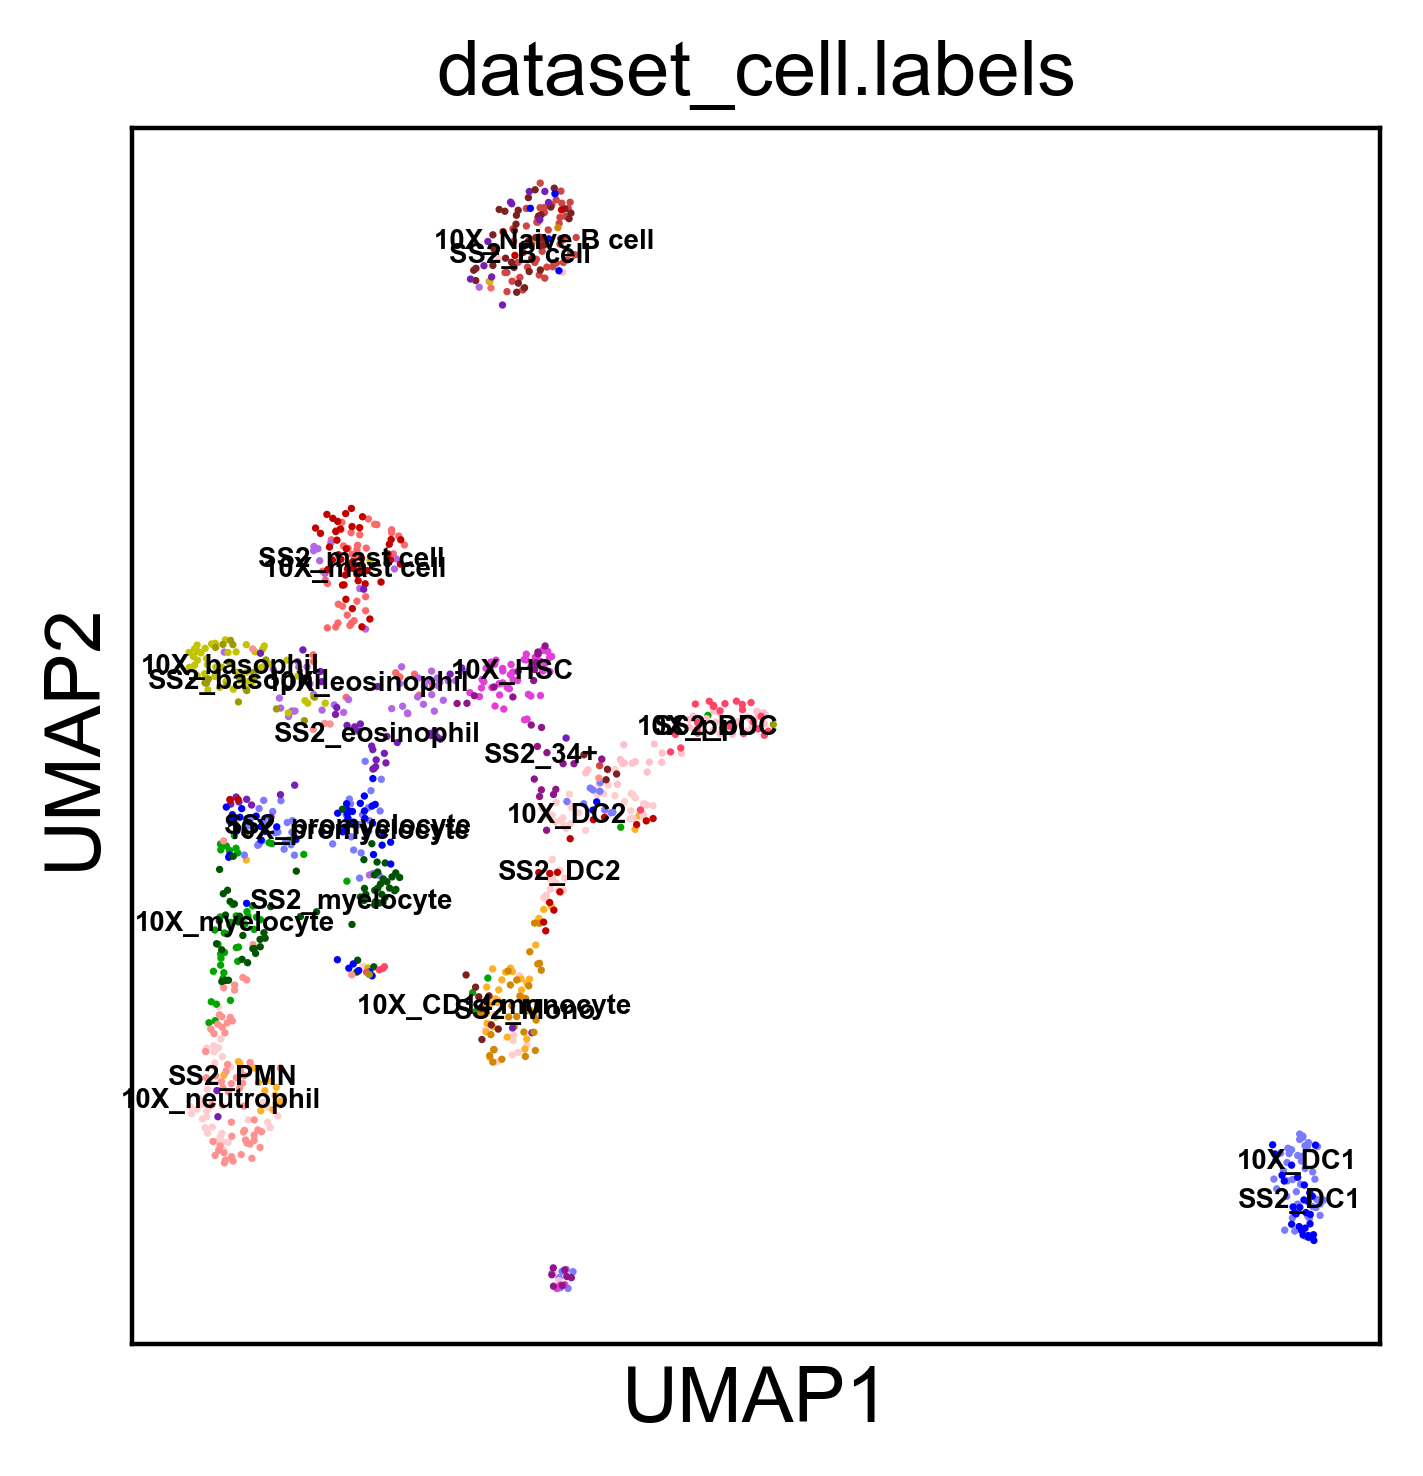

In [65]:
sc.settings.set_figure_params(dpi=200, dpi_save=1000)
sc.pl.umap(adata, color=["dataset_cell.labels"], size=7, legend_loc="on data", legend_fontsize=5)

# Plot dimensional reduction post harmony 

In [66]:
## UMAP
sc.pl.umap(adata, color='dataset_cell.labels', save='_ss2_validation_19pcw_post-harmony_20200414_dataset_labels_legoff.pdf', show=False, size=15) 
sc.pl.umap(adata, color='dataset_cell.labels', save='_ss2_validation_19pcw_post-harmony_20200414_dataset_labels_legon.pdf', show=False, size=15, legend_loc="on data", legend_fontsize=6)

## UMAP
sc.pl.umap(adata, color='sequencing.type', save='_ss2_validation_post-harmony_20200414_seq_type_legoff.pdf', show=False, size=15) 
sc.pl.umap(adata, color='sequencing.type', save='_ss2_validation_post-harmony_20200414_seq_type_legon.pdf', show=False, size=15, legend_loc="on data", legend_fontsize=6)
sc.pl.umap(adata, color='orig.ident', save='_ss2_validation_post-harmony_20200414_sample_legoff.pdf', show=False, size=15) 
sc.pl.umap(adata, color='orig.ident', save='_ss2_validation_post-harmony_20200414_sample_legon.pdf', show=False, size=15, legend_loc="on data", legend_fontsize=6)

# Save data

In [67]:
# save the adata with dr 
adata.write('/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/ss2_validation_dr_20200414.h5ad')

... storing 'gene_ids-1-0-0-0-0-0-0-0-0-0-0-0-0' as categorical
... storing 'feature_types-1-0-0-0-0-0-0-0-0-0-0-0-0' as categorical
... storing 'gene_ids-1-1-0-0-0-0-0-0-0-0-0-0-0' as categorical
... storing 'feature_types-1-1-0-0-0-0-0-0-0-0-0-0-0' as categorical
... storing 'gene_ids-1-1-0-0-0-0-0-0-0-0-0-0' as categorical
... storing 'feature_types-1-1-0-0-0-0-0-0-0-0-0-0' as categorical
... storing 'gene_ids-1-1-0-0-0-0-0-0-0-0-0' as categorical
... storing 'feature_types-1-1-0-0-0-0-0-0-0-0-0' as categorical
... storing 'gene_ids-1-1-0-0-0-0-0-0-0-0' as categorical
... storing 'feature_types-1-1-0-0-0-0-0-0-0-0' as categorical
... storing 'gene_ids-1-1-0-0-0-0-0-0-0' as categorical
... storing 'feature_types-1-1-0-0-0-0-0-0-0' as categorical
... storing 'gene_ids-1-1-0-0-0-0-0-0' as categorical
... storing 'feature_types-1-1-0-0-0-0-0-0' as categorical
... storing 'gene_ids-1-1-0-0-0-0-0' as categorical
... storing 'feature_types-1-1-0-0-0-0-0' as categorical
... storing 'gene_id

# Import packages and data 

In [1]:
import warnings
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.animation as animation
from scipy import sparse

In [2]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=200, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.1 scipy==1.4.1 pandas==0.25.1 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Load the SS2 FBM dataset

In [4]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/ss2_validation_dr_20200414.h5ad')

In [5]:
adata.shape

(1086, 42802)

In [6]:
cell_numbers = adata.obs.groupby(["dataset"]).apply(len)
cell_numbers

dataset
10X    600
SS2    486
dtype: int64

In [7]:
cell_numbers = adata.obs.groupby(["dataset", "orig.ident"]).apply(len)
cell_numbers

dataset  orig.ident
10X      F21            20
         F29            50
         F30            77
         F38            15
         F41            58
         F45            48
         F50            80
         F51           161
         SB19PCW        91
SS2      F83           334
         F90           152
dtype: int64

In [8]:
new_colors = np.array(adata.uns["dataset_cell.labels_colors"])

new_colors[[0]] = '#f9f06c' # 10X HSC
new_colors[[1]] = '#f9f06c' # SS2 HSC
new_colors[[2]] = '#bb7784' # 10X promyelocyte
new_colors[[3]] = '#bb7784' # SS2 promyelocyte
new_colors[[4]] = '#e07b91' # 10X myelocyte
new_colors[[5]] = '#e07b91' # SS2 myelocyte
new_colors[[6]] = '#f3c3db'# 10X neutrophil
new_colors[[7]] = '#f3c3db' # SS2 neutrophil
new_colors[[8]] = '#87288a'# 10X mast cell
new_colors[[9]] = '#87288a' # SS2 mast cell
new_colors[[10]] = '#ad83bb' # 10X eosinophil
new_colors[[11]] = '#ad83bb' # SS2 eosinophil
new_colors[[12]] = '#aaaad5' # 10X basophil
new_colors[[13]] = '#aaaad5' # SS2 basophil
new_colors[[14]] = '#86b3e0'# 10X CD14 monocyte
new_colors[[15]] = '#86b3e0' # SS2 monocyte
new_colors[[16]] = '#0b773c' # 10X pDC
new_colors[[17]] = '#0b773c' # SS2 pDC
new_colors[[18]] = '#d1db94' # 10X naive B cell
new_colors[[19]] = '#d1db94' # SS2 B cell
new_colors[[20]] = '#4d78bc' # 10X DC1
new_colors[[21]] = '#4d78bc' # SS2 DC1
new_colors[[22]] = '#64c5e4'# 10X DC2
new_colors[[23]] = '#64c5e4' # SS2 DC2

adata.uns["dataset_cell.labels_colors"] = new_colors

new_colors

array(['#f9f06c', '#f9f06c', '#bb7784', '#bb7784', '#e07b91', '#e07b91',
       '#f3c3db', '#f3c3db', '#87288a', '#87288a', '#ad83bb', '#ad83bb',
       '#aaaad5', '#aaaad5', '#86b3e0', '#86b3e0', '#0b773c', '#0b773c',
       '#d1db94', '#d1db94', '#4d78bc', '#4d78bc', '#64c5e4', '#64c5e4'],
      dtype=object)

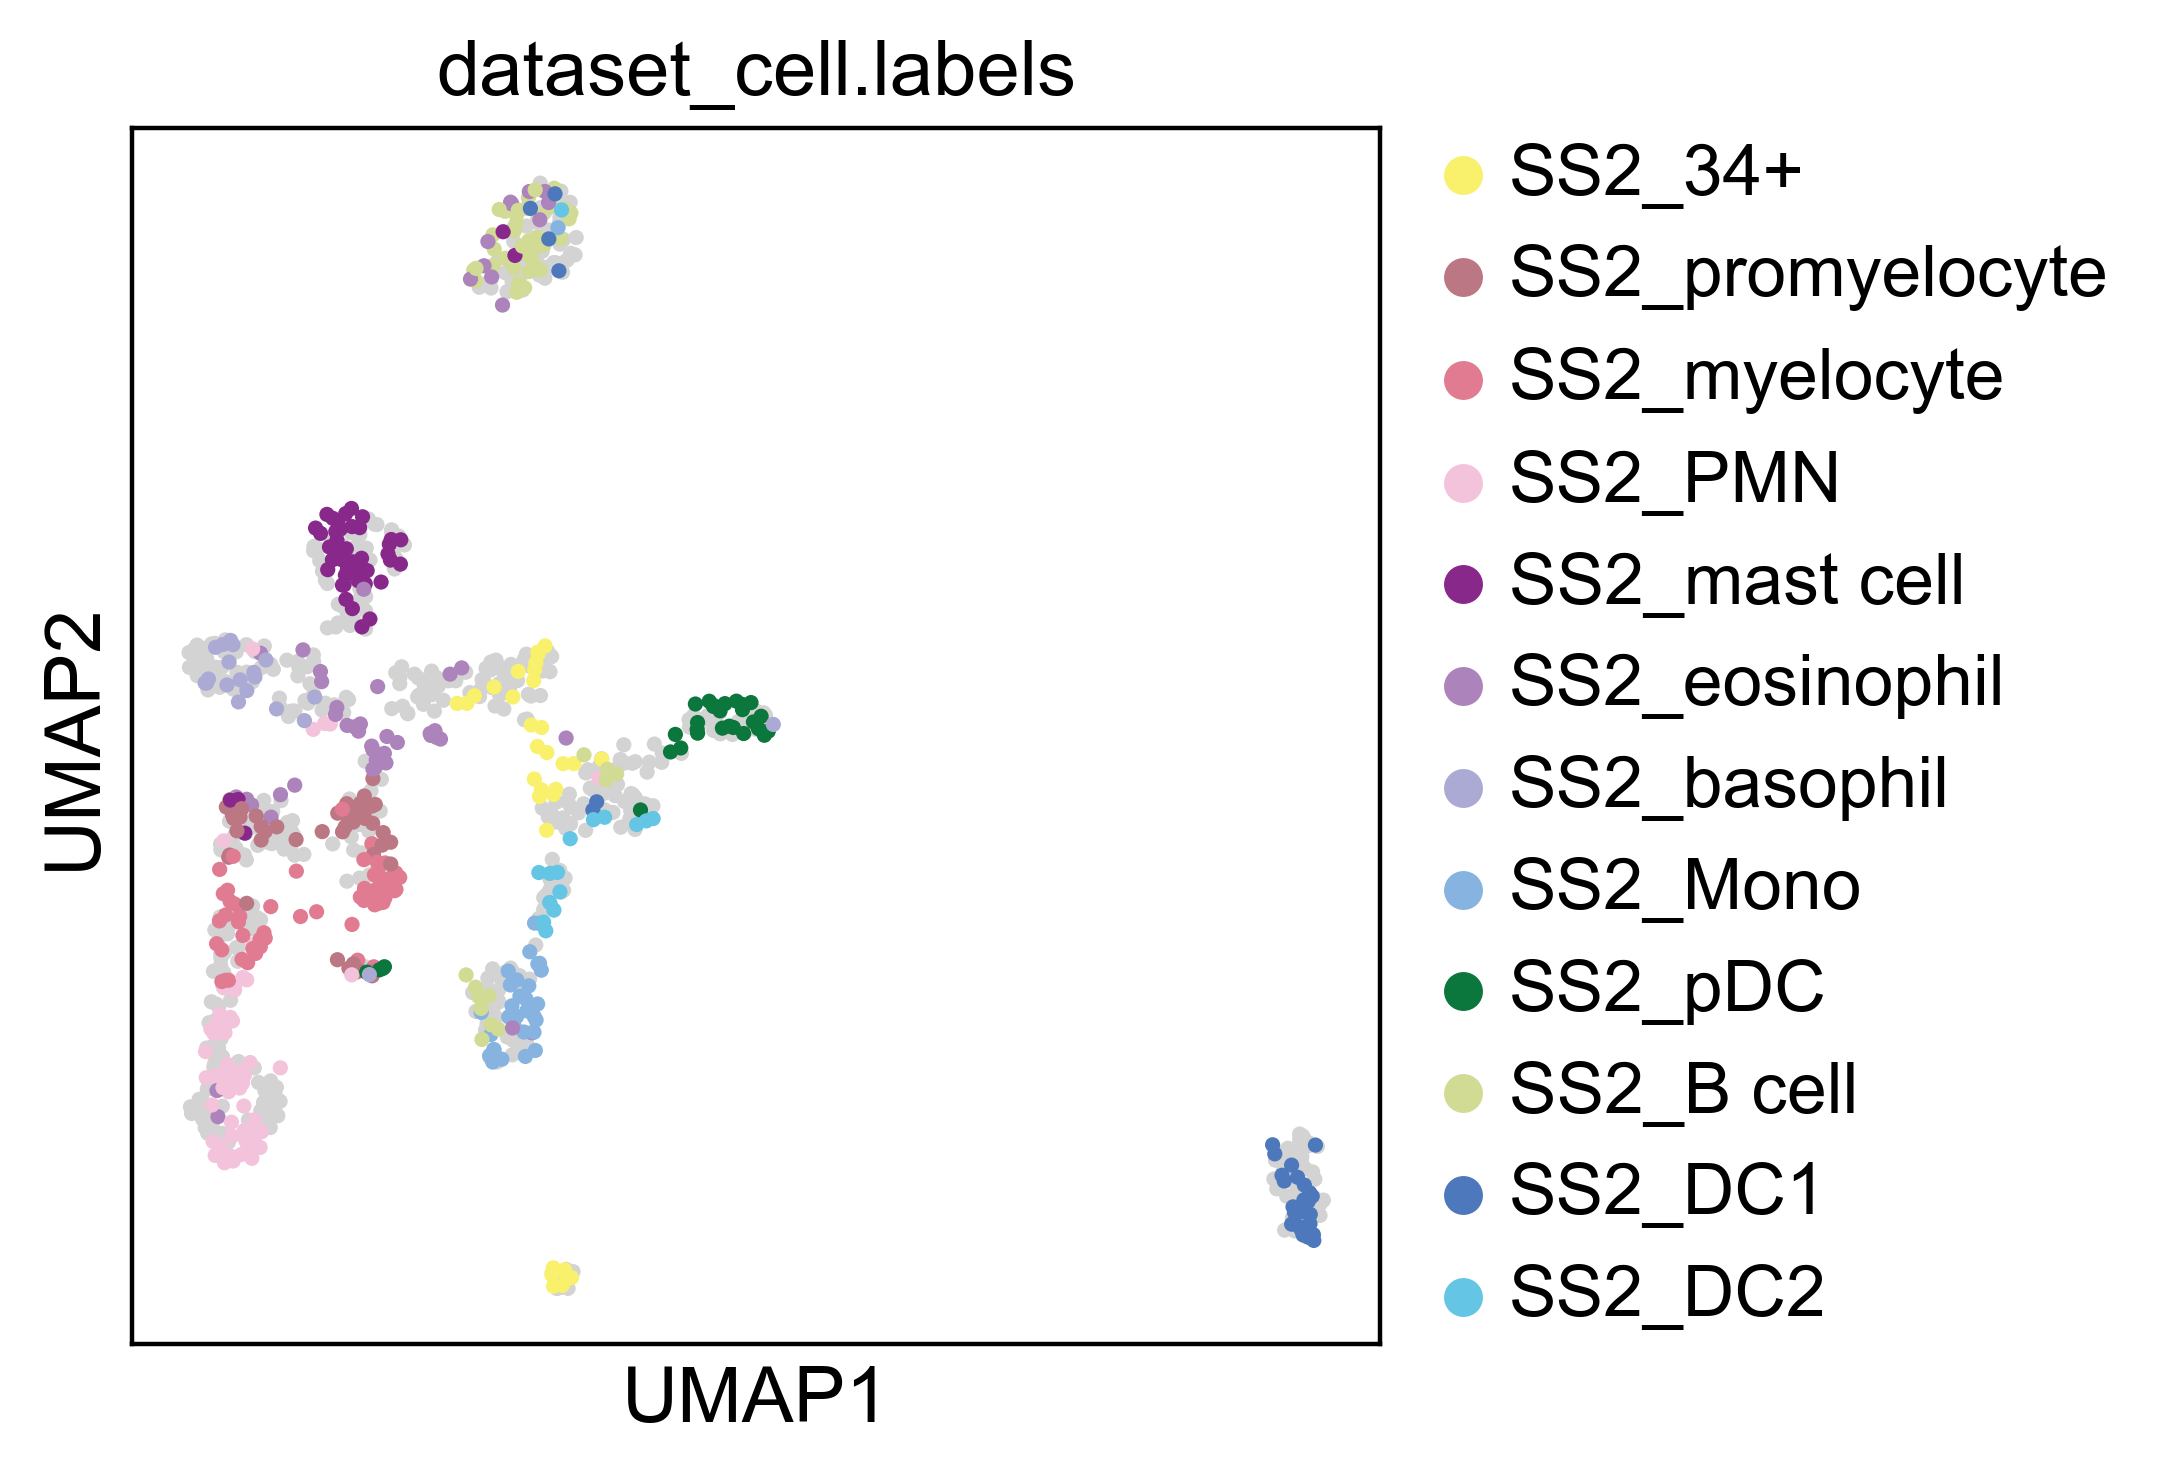

In [13]:
sc.settings.set_figure_params(dpi=200, dpi_save=1000)
sc.pl.umap(adata, color=["dataset_cell.labels"], size=30,
          groups=['SS2_34+', 'SS2_promyelocyte', 'SS2_myelocyte', 
                  'SS2_PMN', 'SS2_mast cell', 'SS2_eosinophil', 
                   'SS2_basophil', 'SS2_Mono', 'SS2_pDC', 
                   'SS2_B cell', 'SS2_DC1', 'SS2_DC2'], save="ss2_overlay_ss2_cells_20200603.pdf")

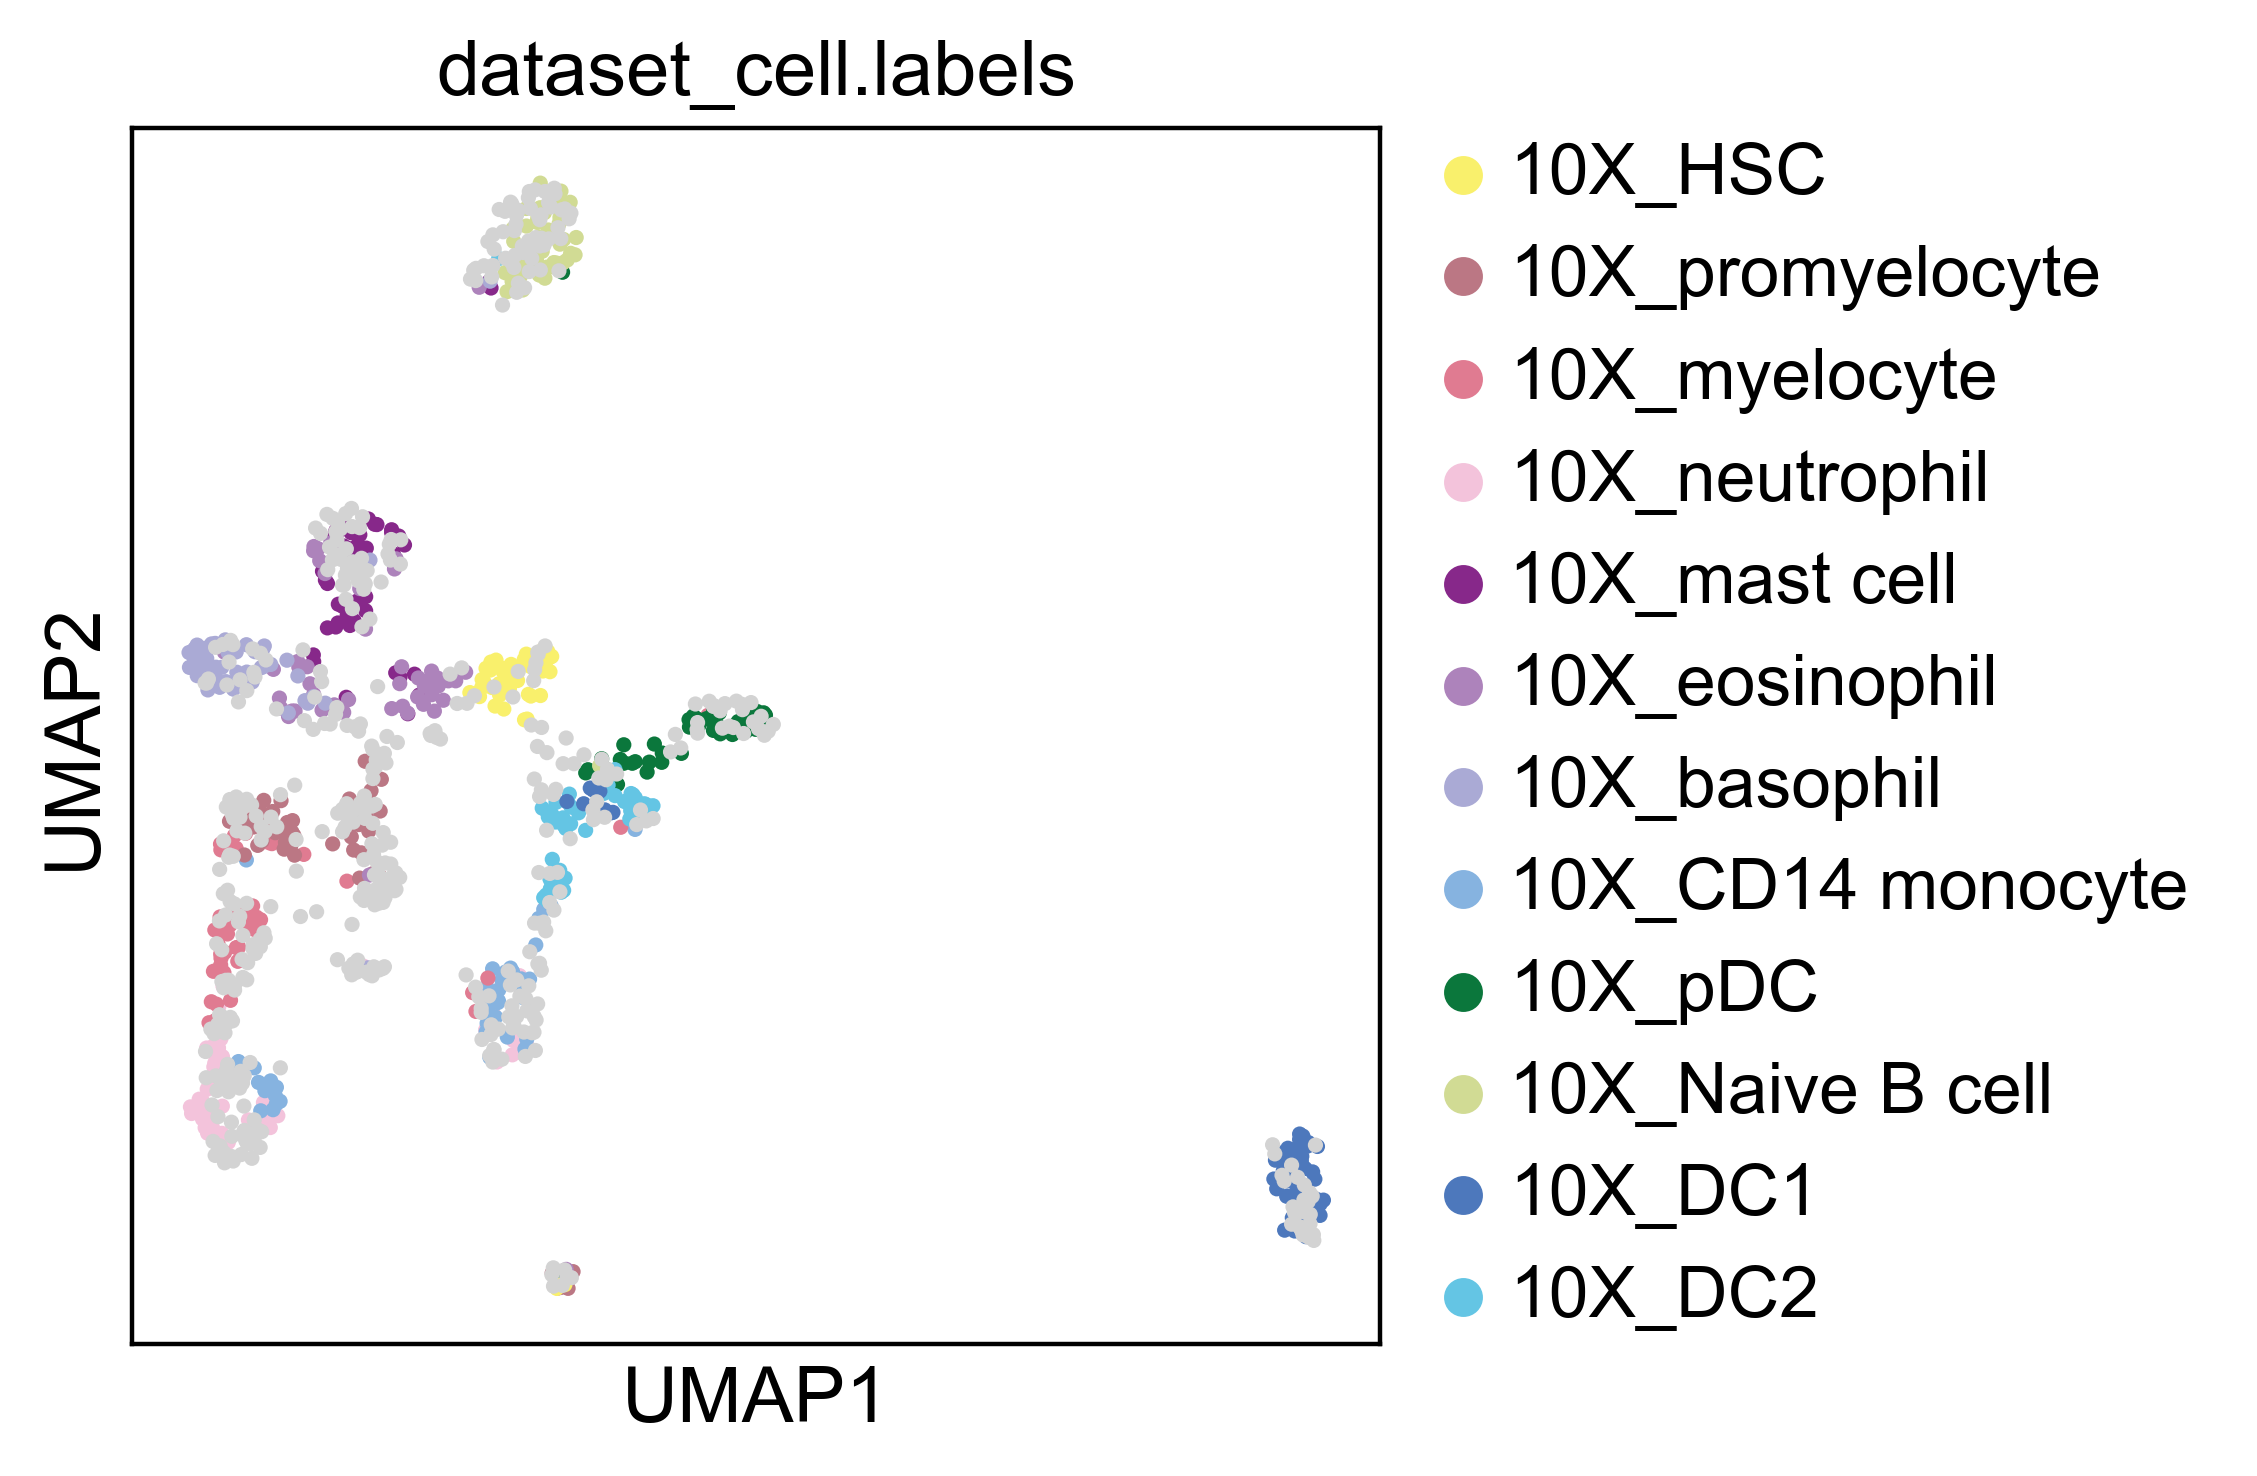

In [14]:
sc.settings.set_figure_params(dpi=200, dpi_save=1000)
sc.pl.umap(adata, color=["dataset_cell.labels"], size=30,
          groups=['10X_HSC', '10X_promyelocyte', '10X_myelocyte', 
                  '10X_neutrophil', '10X_mast cell', '10X_eosinophil', 
                  '10X_basophil', '10X_CD14 monocyte', '10X_pDC', 
                  '10X_Naive B cell', '10X_DC1', '10X_DC2'], 
           save="ss2_overlay_10x_cells_20200603.pdf")